<a href="https://colab.research.google.com/github/eildes06/Machine-Learning/blob/main/DL_Assignment_1_(Classification_with_ANN_Churn_Prediction)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
data= pd.read_csv("/content/Churn_Modelling.csv")
df= data.copy()

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [4]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000              1          1               1   
1       1  83807.860              1          0               1   
2       8 159660.800              3          1               0   
3       1      0.000              2          0               0   
4       2 125510.820              1          1               1   

   EstimatedSalary  Exited  
0       101348.880       1  
1       112542.580       0  
2       113931.570       1  
3        93826.630       0  
4        79084.100       0

In [6]:
df.shape

(10000, 14)

In [7]:
df.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5      0.000              2          1               0   
9996      10  57369.610              1          1               1   
9997       7      0.000              1          0               1   
9998       3  75075.310              2          1               0   
9999       4 130142.790              1          1               0   

      EstimatedSalary  Exited  
9995        96270.640       0  
9996       101699.770       0  
9997        42085.580       1  
9998        92888.520       1  
9999        38190.780       0

Row number , CustomerID, Surname herbirisinin her bir satiri Uniques degerler icerdigi icin bu da benim makinami yoracagi benim calismam icin isime yaramayacagi icin dusurmeye karar verdim :) 


Burdaki target valuem exited dir. Arastrmada bizden istenen 1,0 yani binary bir durum soz konusu.


In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
df.describe(include="all").T

count unique     top  freq         mean       std  \
RowNumber       10000.000    NaN     NaN   NaN     5000.500  2886.896   
CustomerId      10000.000    NaN     NaN   NaN 15690940.569 71936.186   
Surname             10000   2932   Smith    32          NaN       NaN   
CreditScore     10000.000    NaN     NaN   NaN      650.529    96.653   
Geography           10000      3  France  5014          NaN       NaN   
Gender              10000      2    Male  5457          NaN       NaN   
Age             10000.000    NaN     NaN   NaN       38.922    10.488   
Tenure          10000.000    NaN     NaN   NaN        5.013     2.892   
Balance         10000.000    NaN     NaN   NaN    76485.889 62397.405   
NumOfProducts   10000.000    NaN     NaN   NaN        1.530     0.582   
HasCrCard       10000.000    NaN     NaN   NaN        0.706     0.456   
IsActiveMember  10000.000    NaN     NaN   NaN        0.515     0.500   
EstimatedSalary 10000.000    NaN     NaN   NaN   100090.240 57510.493   
Exited          10000.000    NaN     NaN   NaN        0.204     0.403   

                         min          25%          50%          75%  \
RowNumber              1.000     2500.750     5000.500     7500.250   
CustomerId      15565701.000 15628528.250 15690738.000 15753233.750   
Surname                  NaN          NaN          NaN          NaN   
CreditScore          350.000      584.000      652.000      718.000   
Geography                NaN          NaN          NaN          NaN   
Gender                   NaN          NaN          NaN          NaN   
Age                   18.000       32.000       37.000       44.000   
Tenure                 0.000        3.000        5.000        7.000   
Balance                0.000        0.000    97198.540   127644.240   
NumOfProducts          1.000        1.000        1.000        2.000   
HasCrCard              0.000        0.000        1.000        1.000   
IsActiveMember         0.000        0.000        1.000        1.000   
EstimatedSalary       11.580    51002.110   100193.915   149388.247   
Exited                 0.000        0.000        0.000        0.000   

                         max  
RowNumber          10000.000  
CustomerId      15815690.000  
Surname                  NaN  
CreditScore          850.000  
Geography                NaN  
Gender                   NaN  
Age                   92.000  
Tenure                10.000  
Balance           250898.090  
NumOfProducts          4.000  
HasCrCard              1.000  
IsActiveMember         1.000  
EstimatedSalary   199992.480  
Exited                 1.000

In [16]:
for col in df.columns:
  print(f"{col} has {df[col].nunique()} unique value")

RowNumber has 10000 unique value
CustomerId has 10000 unique value
Surname has 2932 unique value
CreditScore has 460 unique value
Geography has 3 unique value
Gender has 2 unique value
Age has 70 unique value
Tenure has 11 unique value
Balance has 6382 unique value
NumOfProducts has 4 unique value
HasCrCard has 2 unique value
IsActiveMember has 2 unique value
EstimatedSalary has 9999 unique value
Exited has 2 unique value


In [18]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [19]:
df.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [20]:
df.duplicated().value_counts()

False    10000
dtype: int64

In [37]:
def first_looking(df):
  for i in df.columns :
    print("column name    : ", i)
    #print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[i].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[i].isnull().sum())
    print("num_of_uniques : ", df[i].nunique())
    #print(df[i].value_counts(dropna = False))
    print("--------------------------------")
    print("--------------------------------")
   

In [38]:
first_looking(df)

column name    :  RowNumber
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  10000
--------------------------------
--------------------------------
column name    :  CustomerId
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  10000
--------------------------------
--------------------------------
column name    :  Surname
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2932
--------------------------------
--------------------------------
column name    :  CreditScore
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  460
--------------------------------
--------------------------------
column name    :  Geography
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  3
--------------------------------
--------------------------------
column name    :  Gender
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
--------------------------------
--------------------------------
column name    :  Age
per_of_nulls   :  %

In [40]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [41]:
missing (df)

Missing_Number  Missing_Percent
RowNumber                     0            0.000
CustomerId                    0            0.000
Surname                       0            0.000
CreditScore                   0            0.000
Geography                     0            0.000
Gender                        0            0.000
Age                           0            0.000
Tenure                        0            0.000
Balance                       0            0.000
NumOfProducts                 0            0.000
HasCrCard                     0            0.000
IsActiveMember                0            0.000
EstimatedSalary               0            0.000
Exited                        0            0.000

In [42]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace= True)

In [44]:
df.shape

(10000, 11)

0    7963
1    2037
Name: Exited, dtype: int64


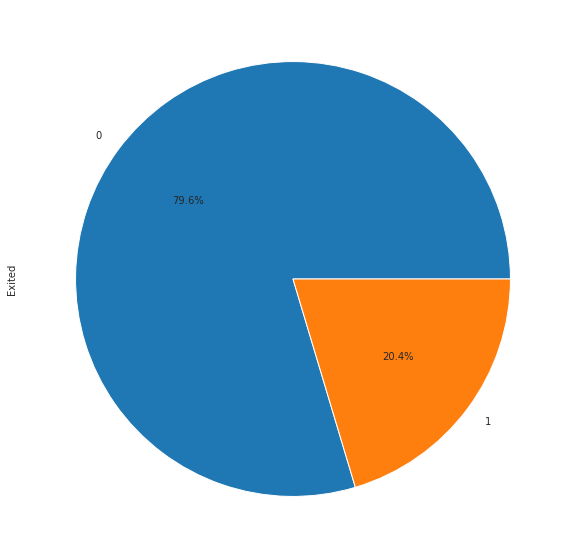

In [45]:
print(df["Exited"].value_counts())
df["Exited"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

In [ ]:
!pip install cufflinks
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [58]:
numerical= df.drop(["Exited","HasCrCard","Gender","Geography"],axis=1)

In [59]:
for i in numerical:
    df[i].iplot(kind="box", title=i, boxpoints="all", color='lightseagreen')

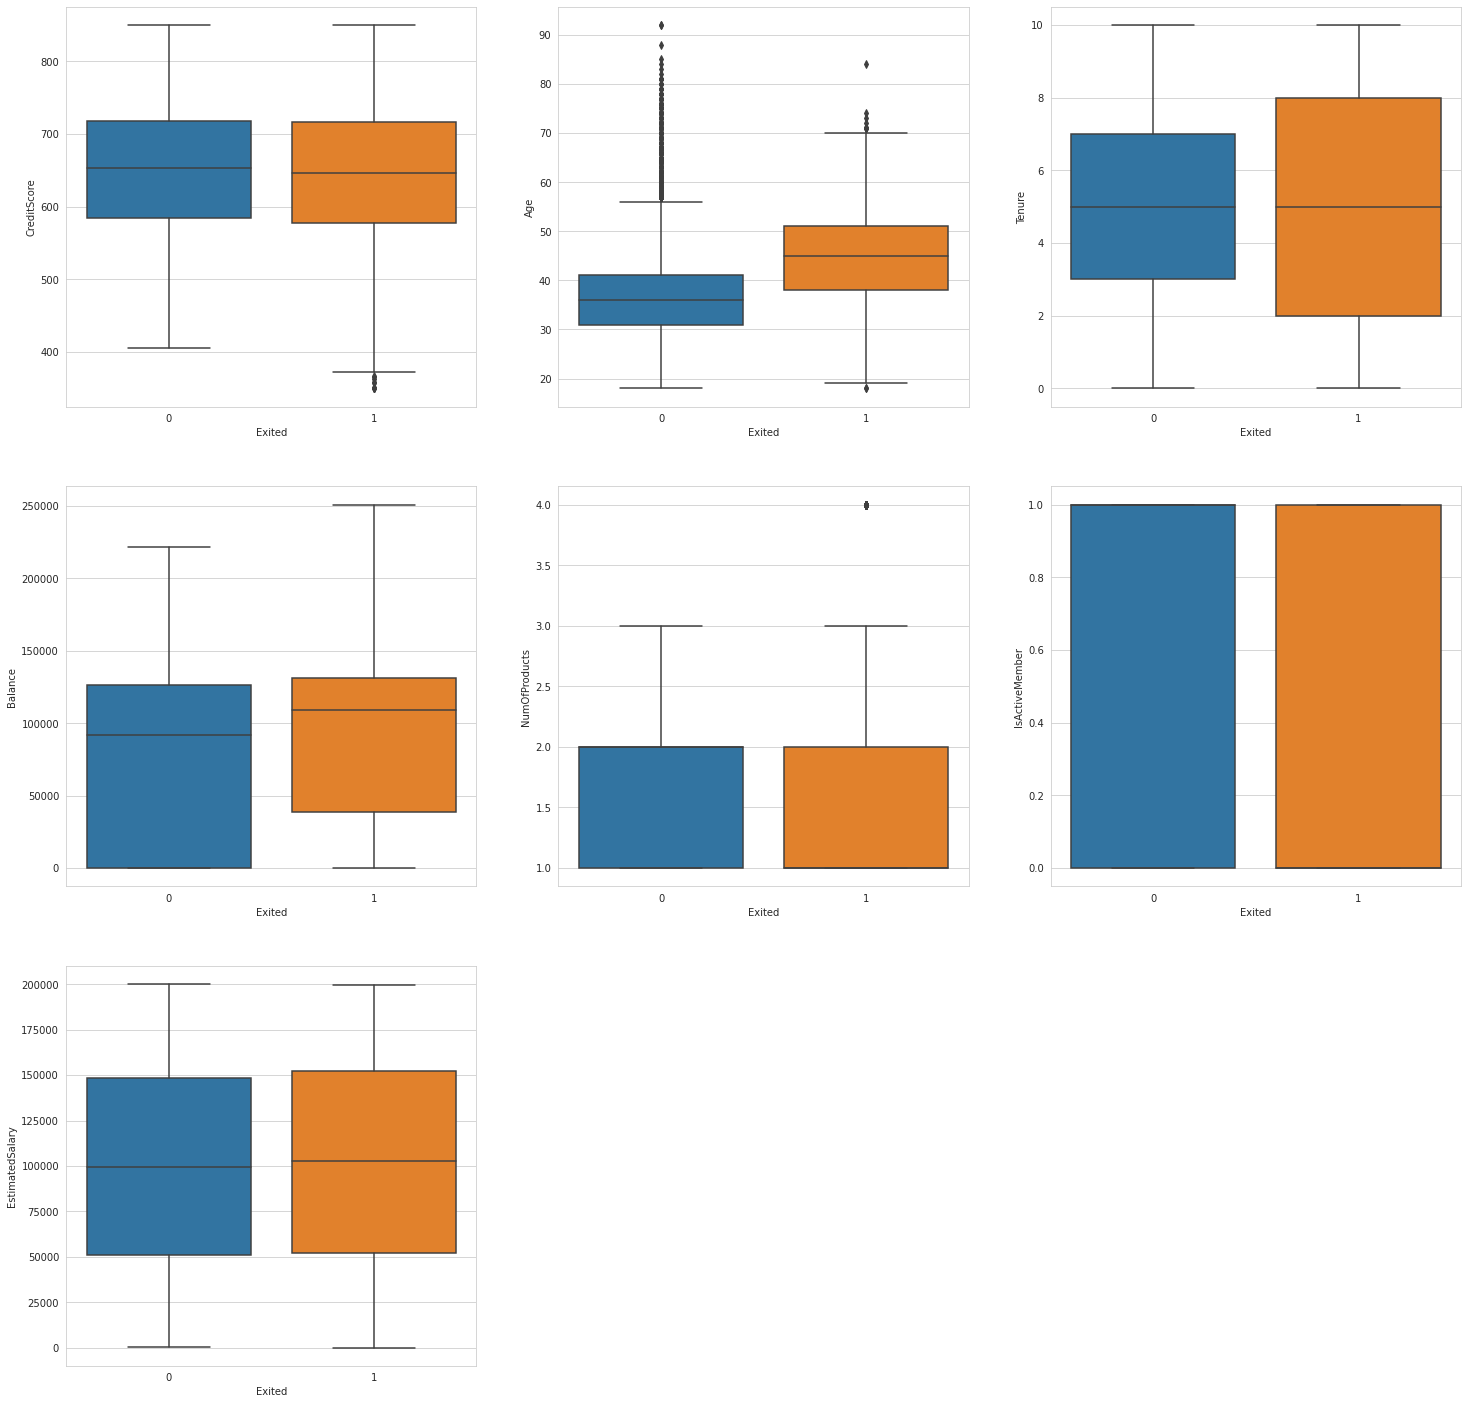

In [60]:
index = 0
plt.figure(figsize=(25,25))
for feature in numerical:
    if feature != "Exited":
        index += 1
        plt.subplot(3, 3, index)
        sns.boxplot(x='Exited', y=feature, data=df)

In [62]:
import plotly.express as px

In [63]:
fig = px.scatter_3d(df, 
                    x='Geography',
                    y='Age',
                    z='Gender',
                    color='Exited')
fig.show();

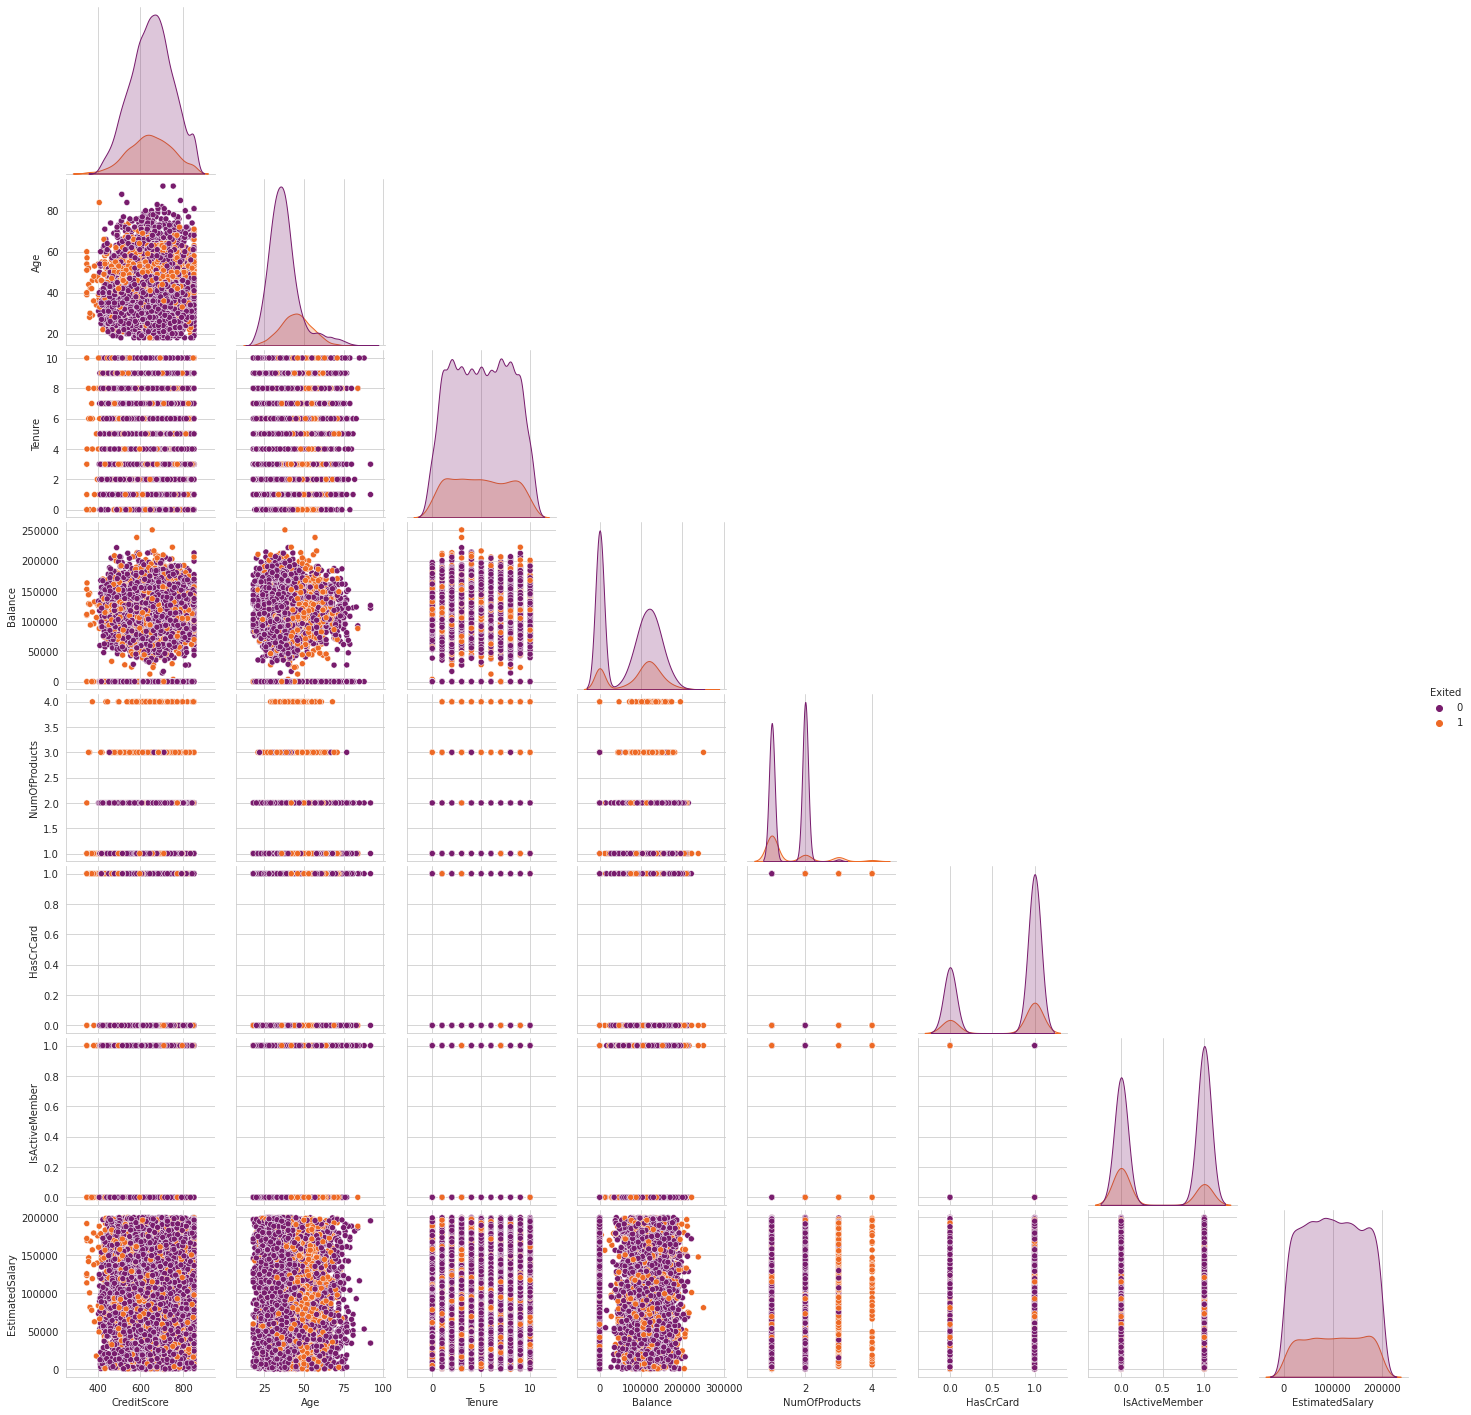

In [64]:
sns.pairplot(df, hue="Exited", palette="inferno", corner=True);

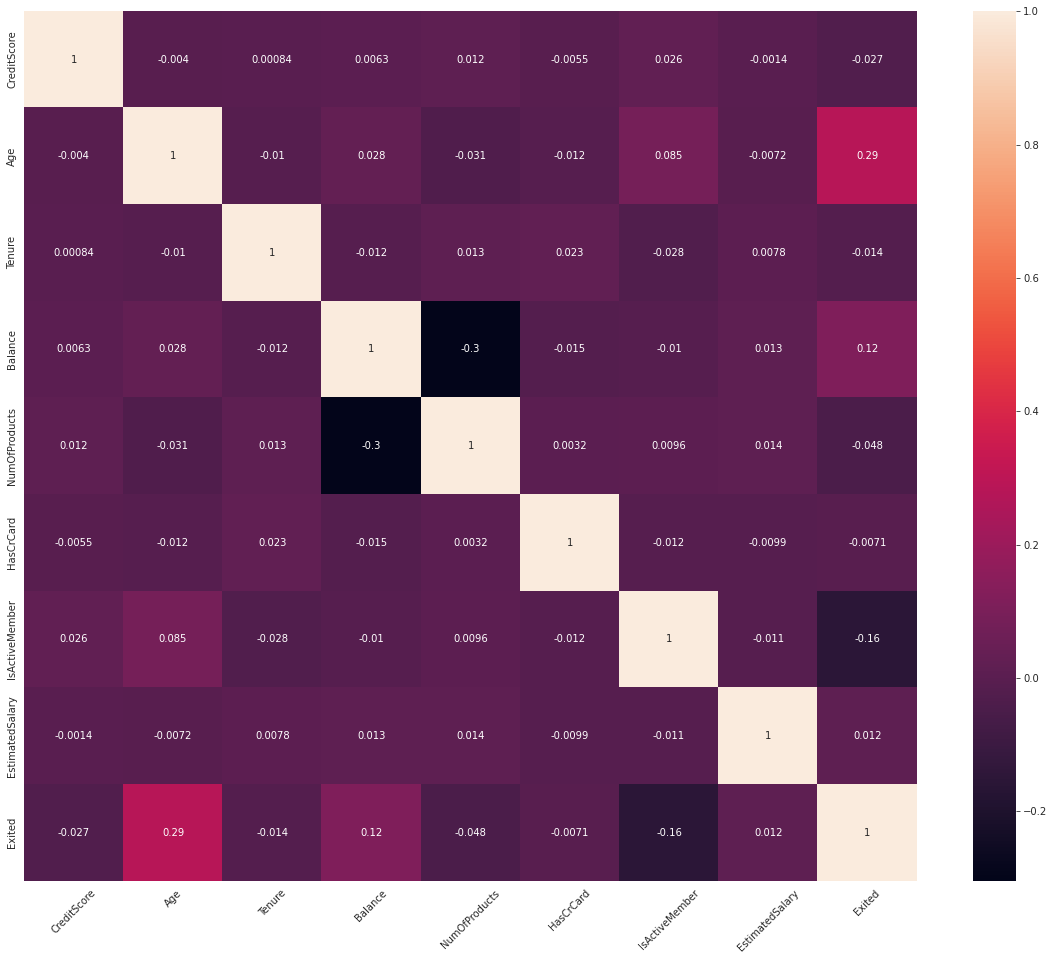

In [65]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=45);

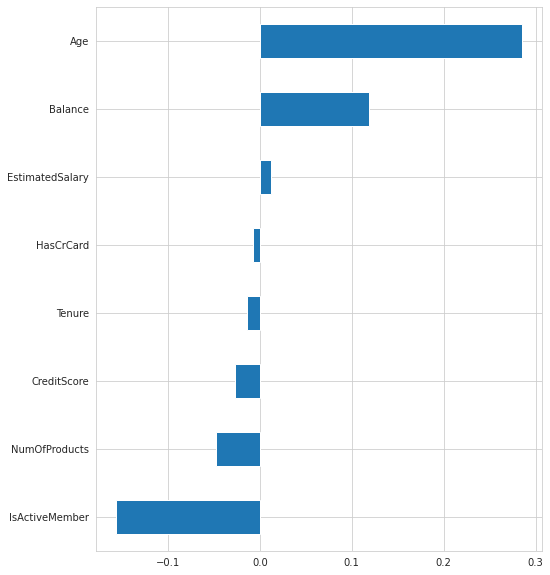

In [66]:
plt.figure(figsize = (8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh");

In [73]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

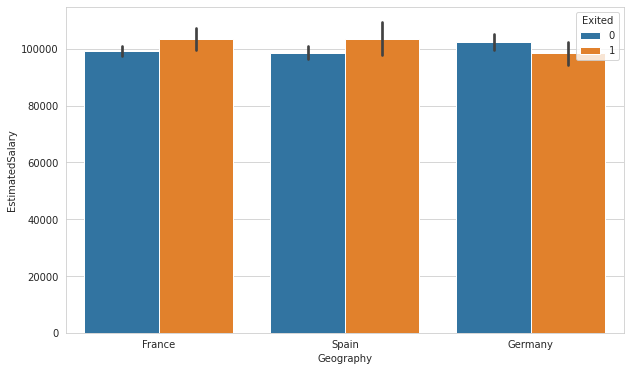

In [76]:
sns.barplot(x = 'Geography',y = 'EstimatedSalary', data = df, hue = "Exited");

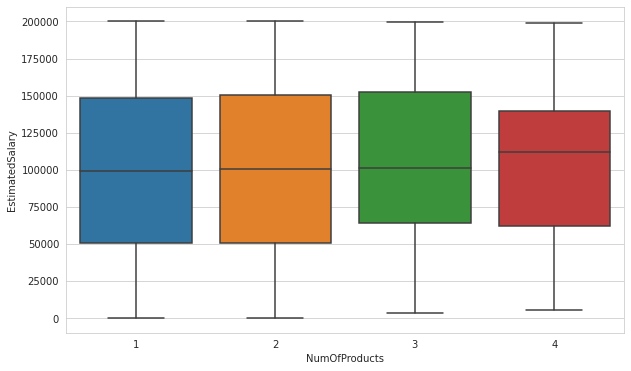

In [79]:
sns.boxplot(x = 'NumOfProducts', y = 'EstimatedSalary', data = df);

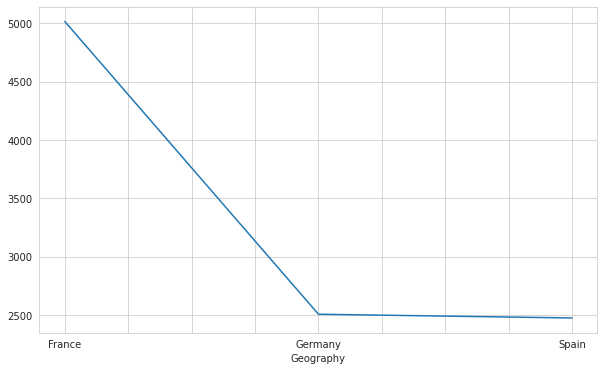

In [87]:
df.groupby('Geography')['Exited'].count().plot();

In [91]:
dfn= pd.get_dummies(df)

In [92]:
dfn.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2      0.000              1          1   
1          608   41       1  83807.860              1          0   
2          502   42       8 159660.800              3          1   
3          699   39       1      0.000              2          0   
4          850   43       2 125510.820              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1       101348.880       1                 1   
1               1       112542.580       0                 0   
2               0       113931.570       1                 1   
3               0        93826.630       0                 1   
4               1        79084.100       0                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                  0                0              1            0  
1                  0                1              1            0  
2                  0                0              1            0  
3                  0                0              1            0  
4                  0                1              1            0

In [93]:
dfn.drop("Gender_Female",axis=1, inplace=True)

In [94]:
dfn.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Male'],
      dtype='object')

# Preprocessing of Data
- Train | Test Split, Scalling

In [95]:
from sklearn.model_selection import train_test_split

In [102]:
X = dfn.drop('Exited', axis = 1)
y = dfn['Exited']

In [104]:
seed = 101

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

In [105]:
from sklearn.preprocessing import MinMaxScaler 

In [106]:
scaler = MinMaxScaler()

In [107]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
X_train.shape

(9000, 12)

In [110]:
dfn.Exited.value_counts() #balance degildi datamiz 

0    7963
1    2037
Name: Exited, dtype: int64

# Modelling & Model Performance

In [108]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
model = Sequential()
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

## without class_weigth

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

### Add Dropout Layer

### Add Early Stop

#### Monitor the "val_loss" as metric

#### Monitor the "val_recall" as metric

## GridSearchCV

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

# Final Model and Model Deployment

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___